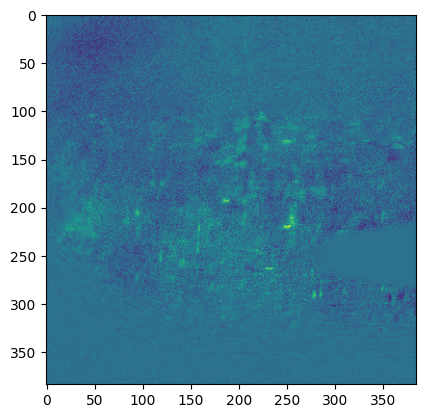

In [115]:
#!/usr/local/bin/python2.7
# -*- coding: utf-8 -*-
# 動くものを撮影することを拒否するカメラ。

import cv2
import numpy as np
import sys
import trackpy as tp


file = "/Users/matto/Dropbox/CO2/Movies/mori/KG0916bR6_S0001.mp4"
# file = "/Users/matto/Dropbox/CO2/Movies/mori/KG0724aR6P7_S0001.mp4"

cap = cv2.VideoCapture(file)

frames = []
for i in range(110):
    ret, frame = cap.read()
    frame = frame[:, :, 1].astype(float)
    frames.append(frame)

for i in range(100):
    frames[i] = frames[i] - np.mean(np.array(frames[i : i + 10]), axis=0)

plt.imshow(frames[0])

In [106]:
f = tp.locate(frames[450], 7, invert=False)
f.head()

IndexError: list index out of range

In [107]:
tp.annotate(f, frames[450])

IndexError: list index out of range

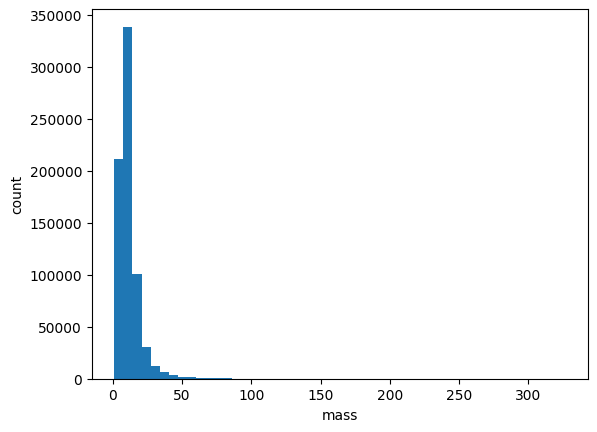

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(f["mass"], bins=50)

# Optionally, label the axes.
ax.set(xlabel="mass", ylabel="count")

In [109]:
f = tp.batch(frames, 7, invert=False)

Frame 109: 660 features


In [110]:
# 7 is max
t = tp.link(f, search_range=7, memory=3)
t.head()

Frame 109: 660 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,2.957792,222.201299,6.950423,1.382873,0.067790,1.218581,-1.9,-1.579563,0,0
459,220.112782,223.031955,24.010552,1.607665,0.201889,2.504860,42.4,0.053863,0,1
460,220.261544,250.654212,64.020616,1.768901,0.427430,5.754409,293.6,0.007847,0,2
461,219.528455,282.973803,24.980903,1.697812,0.209014,2.437161,48.3,0.047343,0,3
462,220.961456,190.064240,10.538466,1.397459,0.329698,1.782738,7.0,0.310178,0,4


In [111]:
t1 = tp.filter_stubs(t, 10)
# Compare the number of particles in the unfiltered and filtered data.
print("Before:", t["particle"].nunique())
print("After:", t1["particle"].nunique())

Before: 8323
After: 2915


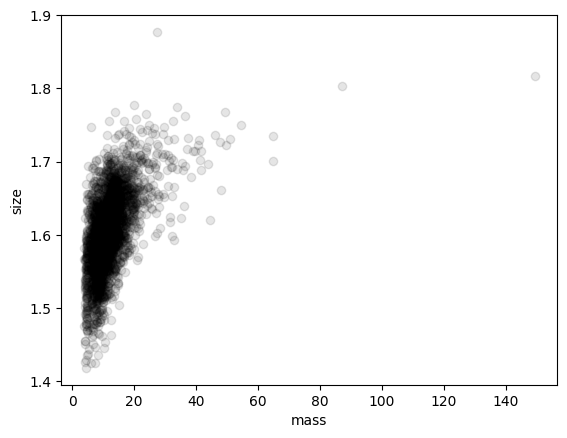

In [112]:
plt.figure()
tp.mass_size(t1.groupby("particle").mean())
# convenience function -- just plots size vs. mass

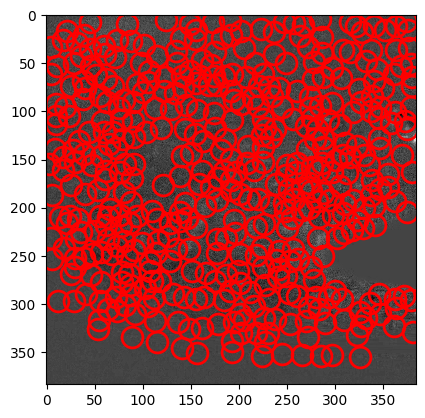

In [113]:
plt.figure()
tp.annotate(t1[(t1["frame"] == 99) & (t1["signal"] < 5)], frames[99])

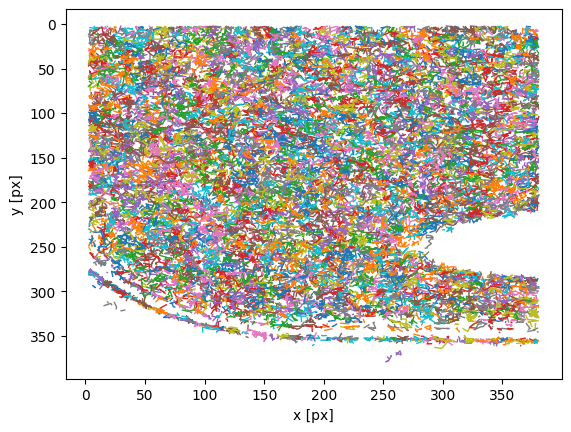

In [114]:
plt.figure()
tp.plot_traj(t1)